In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics

In [132]:
#conda install python-graphviz

# Importing the dataset

In [133]:
df=pd.read_csv("titanic.csv",encoding="Utf-8")

In [134]:
print(df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0          343         0       2    1  28.0      0      0  13.0000         0   
1           76         0       3    1  25.0      0      0   7.6500         0   
2          641         0       3    1  20.0      0      0   7.8542         0   
3          568         0       3    0  29.0      0      4  21.0750         0   
4          672         0       1    1  31.0      1      0  52.0000         0   

  Title  FamilySize  
0   Mrs           0  
1   Mrs           0  
2   Mrs           0  
3   Mrs           4  
4   Mrs           1  


# General Informations

In [135]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    object 
 10  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 76.7+ KB
None


# Preprocessing

In [136]:
print(df.isnull().sum().sum())

0


In [137]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [138]:
x=df[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize"]]
y= df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) 

In [139]:
dtree = tree.DecisionTreeClassifier(criterion= "gini" ,splitter="random",max_leaf_nodes=10,min_samples_leaf =5,max_depth= 5)
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test) 
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8022388059701493


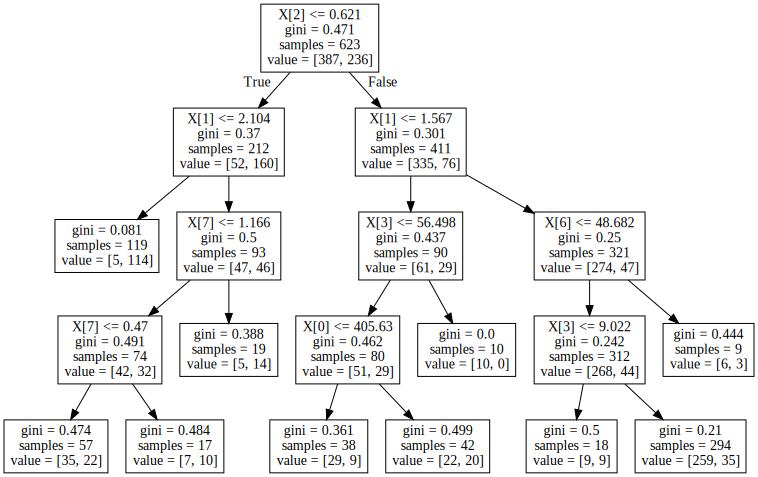

In [140]:
dot_data=tree.export_graphviz(dtree , out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [141]:
dtree = tree.DecisionTreeClassifier(criterion= "gini" ,splitter="random",max_leaf_nodes=5,min_samples_leaf =3,max_depth= 5)
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test) 
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8022388059701493


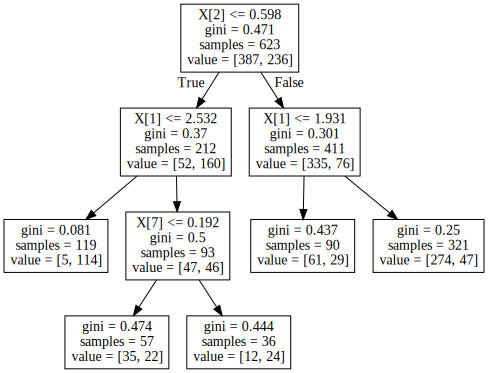

In [142]:
dot_data=tree.export_graphviz(dtree , out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

# Random Forest prediction

In [143]:
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8059701492537313


In [144]:
clf=RandomForestClassifier(n_estimators=15) 
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8134328358208955
